# Fjerdeordens Runge-Kutta metoden for løsning av differensialligninger

### TFY4163 Fluidmekanikk og bølgefysikk - Programmeringsøving 3 

$\textbf{Forkunnskaper:}$ Euler-Cromer metoden, bruk av `scipy.integrate.solve_ivp` funksjonen fra SciPy biblioteket. Les gjennom introduksjon til Runge-Kutta metoden.  

$\textbf{Læringsmål:}$ Implementere fjerdeordens Runge-Kutta metoden, og utføre konvergenstest.

--------

### Oppgave 1 -  Sammenligning av RK5(4) metoden og Euler-Cromer metoden
--------

I programmeringsøving 2 ble løsning av bevegelsesligningen for en enkel harmonisk pendel ved RK5(4) metoden implementert ved å bruke `scipy.integrate.solve_ivp` funksjonen. Vi skal igjen se på enkel harmonisk pendelbevegelse. Bruk initialverdier og parametrene under.

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s

$\textbf{a)}$ Plot vinkelutslaget, $\theta$, som funksjon av tid, $t$, med tidssteg $\Delta t = 0.1$ s både for Euler-Cromer metoden og RK5(4) metoden, sammen med den analytiske løsningen av ligningen. Plott opp til $t=10$s. Den analytiske løsningen er $\theta(t) = \theta_0 \cos(\omega t)$, med $\omega = \sqrt{g/l}$. Du vil observere at RK5(4) metoden gir en løsning nærmere den analytiske enn Euler-Cromer metoden. Dette er fordi Euler-Cromer metoden er en første ordens metode, mens RK5(4) er en høyere ordens metode. *Merk:* Noe av koden du trenger for å løse denne oppgaven er gitt under, men du kan også bruke koden du selv skrev i programmeringsøving 2 (gitt at den fungerer som forventet). 

C:\Users\zulla\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


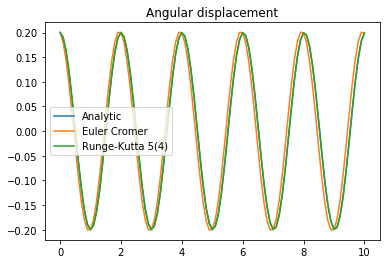

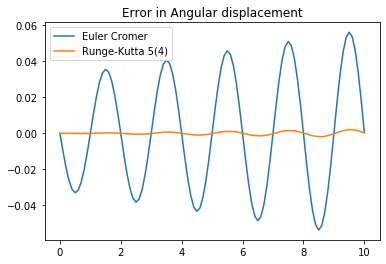

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

%matplotlib inline

def euler_cromer_approx(theta_0, w_0, dt):
    """
    Calculates angular displacement and angular velocity 
    using the Euler-Cromer method 
    """
    N = int(T/dt)
    theta = np.zeros(N+1)
    w = np.zeros(N+1)
    t = np.linspace(0, T, N + 1)
    theta[0] = theta_0
    w[0] = w_0
    for i in range(N):
        w[i+1] = w[i] - g/l*theta[i]*dt
        theta[i+1] = theta[i] + w[i+1]*dt
    return theta, w, t


# RK5(4) method

def equation(t, vals):
    """
    Calculates the value of RHS of the differentail equations given an array (vals) which 
    contains the values of the parameters

    Parameters
    -----------
    t: float
    time
    
    vals: array
    values of theta and omega, [theta, omega] 
    
    Returns
    -------
    [dtheta, dw]: list with values of the RHS of the equations.
    """
    dw = -g/l*vals[0]  # Regner ut endring i w. 
    dtheta = vals[1]
    return [dtheta, dw]

def RK45_method(RHS, theta_0, w_0, t_1, dt):
    """
    Calculates the angular dispacement and angular velocity.
    
    Parameters:
    ------------
    RHS: right hand side of the differentail equations
    theta_0: initial value of angular displacement
    w_0: initial value of the angular velocity
    t_1: time to calculate up to
    dt: timestep 
    
    returns:
    ---------
    
    theta: array of theta values
    w: array of omega values
    t: array of time values
    """
    
    init_values = [theta_0, w_0]
    t_span = [0, t_1+dt]
    t = np.arange(0, t_1 + dt, dt)
    theta12 = integrate.solve_ivp(RHS, t_span, init_values, method = 'RK45', t_eval = t)
    theta = theta12.y[0, :]
    w = theta12.y[1, :]
    t = theta12.t
    return theta, w, t

theta_analytic_func = lambda theta_0,t : theta_0*np.cos(np.sqrt(g/l)*t)

# Initial Parameters

l = 1.0
m = 5.0
g = 9.8
theta_0 = 0.2
omega_0 = 0.0

# Timing parameters

dt = 0.1
T = 10
t = np.linspace(0,T,dt)


theta_ec,omega_ec,t = euler_cromer_approx(theta_0,omega_0,dt)

theta_analytic = theta_analytic_func(theta_0,t)

theta_RK45,omega_RK45,times = RK45_method(equation, theta_0, omega_0, T, dt)

plt.figure("Theta")
plt.title("Angular displacement")
plt.plot(t,theta_analytic,label="Analytic")
plt.plot(t,theta_ec,label="Euler Cromer")
plt.plot(t,theta_RK45,label="Runge-Kutta 5(4)")
plt.legend()
plt.show()

plt.figure("Theta err from analytic")
plt.title("Error in Angular displacement")
# plt.plot(t,theta_analytic-theta_analytic,label="Analytic")
plt.plot(t,theta_ec-theta_analytic,label="Euler Cromer")
plt.plot(t,theta_RK45-theta_analytic,label="Runge-Kutta 5(4)")
plt.legend()
plt.show()

### Oppgave 2 - Konvergenstest for fjerdeordens Runge-Kutta metoden
-------

Fjerdeordens Runge-Kutta metoden er en fjerdeordens numerisk metode for å løse ordinære differensialligninger. Dette er en $\textit{fjerde ordens}$ metode, som vil si at feilen (totalt akkumulert) går som $\sim \Delta t^4$. Sammenlignet med f.eks. Euler-Cromer metoden, som er en første ordens metode, hvor feilen går som $\sim \Delta t$, vil vi kunne benytte et større tidssteg og oppnå lik feil. 


$\textbf{a)}$ Vi skal nå implementere RK4 metoden for å løse differensialligninger. Du får utgitt kode som beregner ett steg i Runge-Kutta metoden i cella under. Skriv en funksjon som beregner utslagsvinkelen, $\theta$, og vinkelhastigheten, $\omega$, ved Runge-Kutta medtoden. $\textit{Hint:}$ `RK4_step(theta, w, dt)` regner ut ett steg, så du må benytte en løkke hvor du beregner n-1 steg for å finne vinkelutslaget.

In [2]:
k = lambda theta : -g/l*theta

f = lambda omega : omega

def RK4_step(k, f, theta, w, dt):
    """
    Calculates one step of the RK4-algorithm.
    
    theta: float
    previous value of theta
           
    w: float
    previous value of w (omega, angular velocity)
    
    dt: float
    timestep
    
    return: two floats 
    """
    k1 = k(theta)
    f1 = f(w)
    k2 = k(theta + (dt/2)*f1)
    f2 = f(w + (dt/2)*k1)
    k3 = k(theta + (dt/2)*f2)
    f3 = f(w + (dt/2)*k2)
    k4 = k(theta + dt*f3)
    f4 = f(w + dt*k3)
    return theta + (dt/6)*(f1 + (2*f2) + (2*f3) + f4), w + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(k, f, theta_0, omega_0, dt):
    """
    Computes theta and w (omega).  
    
    Parameters
    -----------
    k: RHS of equation
    f: RHS of equation
    theta0: initial value of theta
    w0: initail value of omega
    dt: timestep
    
    return theta, w, t
    """
    t = np.linspace(0,T,T/dt)
    theta = np.zeros(len(t))
    omega = np.zeros(len(t))
    
    
    theta[0],omega[0] = theta_0,omega_0
    
    for i in range(1,len(t)):
        theta[i],omega[i] = RK4_step(k, f, theta[i-1], omega[i-1], dt)
    
    return theta, omega, t

$\textbf{b)}$ Benytt intitialbetingelsene og parametrene under, og plot vinkelutslaget, $\theta$ som funksjon av tid, $t$, opp til $t = 20$s. Bruk tidssteg $\Delta t = 0.01$ s.

- Lengden av snora, $l = 1.0$ m
- Masse, $m = 5$ kg
- Tyngdeakselerasjonen, $g = 9.8 \: \text{m}/\text{s}^2$ 
- Startvinkel til snora med hensyn til vertikalen, $\theta_0 = 0.2$ rad
- Vinkelhastighetens startverdi, $\omega_0 = 0.0$ rad/s

C:\Users\zulla\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


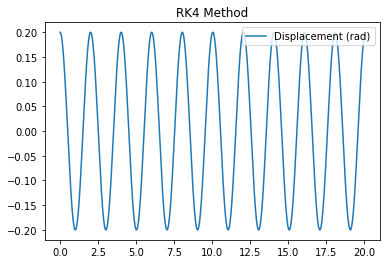

In [3]:
# Initial physical parameters

l = 1.0
m = 5.0
g = 9.8
theta_0 = 0.2
omega_0 = 0.0

# Timing parameters

T = 20 
dt = 0.01

theta_RK4,omega_RK4,t = RK4_method(k, f, theta_0, omega_0, dt)

plt.figure("RK4")
plt.title("RK4 Method")
plt.plot(t,theta_RK4,label="Displacement (rad)")
plt.legend(loc="upper right")
plt.show()

$\textbf{c)}$ Den totale energien til den enkle harmoniske pendelen er gitt ved (ble utledet i programmeringsøving 1)

\begin{equation}
 	E = E_k + E_p = \frac{1}{2} m l^2 \omega^2 + \frac{1}{2} mgl\theta^2.
	\label{eq:energy}
\end{equation}

Plot den kinetisk energien, den potensielle energien og total energi som funksjon av tid i samme figur. Bruk fjerde-ordens Runge-Kutta metoden med tidssteg $\Delta t = 0.01$ s. 

C:\Users\zulla\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


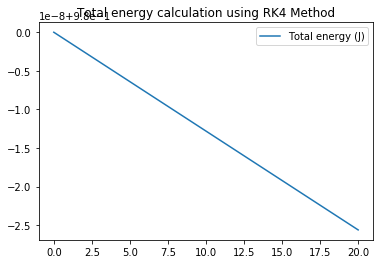

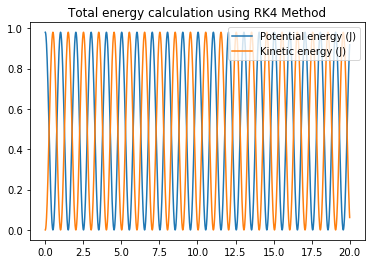

In [4]:
E_kin = lambda omega : (1/2)*m*l**2*omega**2
E_pot = lambda theta : (1/2)*m*g*l*theta**2

E_tot = lambda theta,omega: E_kin(omega) + E_pot(theta)

theta_RK4, omega_RK4,t = RK4_method(k, f, theta_0, omega_0, dt)

E_t = E_tot(theta_RK4,omega_RK4)
E_k = E_kin(omega_RK4)
E_p = E_pot(theta_RK4)

plt.figure("Energy RK4")
plt.title("Total energy calculation using RK4 Method")
plt.plot(t,E_t,label="Total energy (J)")
plt.legend()
plt.show()

plt.figure("Energy RK4")
plt.title("Total energy calculation using RK4 Method")
plt.plot(t,E_p,label="Potential energy (J)")
plt.plot(t,E_k,label="Kinetic energy (J)")
plt.legend(loc="upper right")
plt.show()

$\textbf{d)}$ Vi skal nå utføre $\textit{konvergenstest}$. Vi vet at for å ha en fysisk løsning på systemet, må energien være konstant. Vi kan derfor beregne hvor mye energien har endret seg fra starten til slutten av tidsintervallet, for hvert tidssteg. 

Skriv en funksjon som beregner energidifferansen mellom start- og sluttid, for tidssteg mellom $\Delta t_\text{start} = 0.0001$ s og $\Delta t_\text{slutt} = 0.1$ s, og stegdifferanse $\Delta_\text{steg} = 0.0001$ s. Plot så energidifferansen som funksjon av størrelse på tidssteg. $\textit{Hint:}$ Lag en for-løkke som itererer over $\Delta t$ verdiene, og kjører `RK4_method` funksjonen for hvert tidssteg.

C:\Users\zulla\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\zulla\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


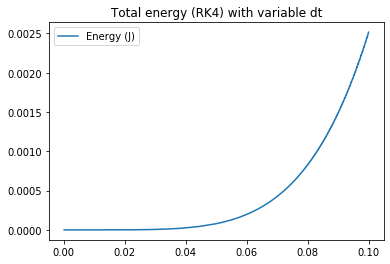

In [5]:
dt_i = 0.0001
dt_f = 0.1
dt_delta = 0.01
T = 20

dt = np.linspace(dt_i,dt_f,T/dt_delta)
E_total = np.zeros(len(dt))

for i in range(0,len(dt)):
    theta_RK4, omega_RK4,t = RK4_method(k, f, theta_0, omega_0, dt[i])
    
    E_k_i = E_kin(omega_RK4[0])
    E_p_i = E_pot(theta_RK4[0])
    
    E_k_f = E_kin(omega_RK4[-1])
    E_p_f = E_pot(theta_RK4[-1])
    
    E_total[i] = abs((E_k_f + E_p_f) - (E_k_i + E_p_i))
    
plt.figure("Energy RK4 sfa dt")
plt.title("Total energy (RK4) with variable dt")
plt.plot(dt,E_total,label="Energy (J)")
plt.legend()
plt.show()

## Ekstraoppgave (frivillig) - Flyttall-feil

Flyttall-feil oppstår når datamaskiner ikke klarer å representere tall med stor nok presisjon. Dette skjer blant annet fordi datamaskiner bruker et binært tallsystem (med 0 og 1). Selv om vi som regel ikke har behov for å tenke mye på flyttall-feil, kan de oppstå når du minst venter det. F.eks. når du trekker store og små tall fra hverandre i Python, eller hvis du prøver å representere et irrasjonelt tall eller tall med "uendelig" mange desimaler på en datamaskin. Et eksempel er $\pi$, som ikke kan representeres helt nøyaktig, selv med all lagringskapasitet i universet. 

### Frivillig arbeidskrav:

- Bruk Numpy og lag en variabel `sin_val` som er lik $\sin(2\pi)$ og en variabel kalt `cos_val` som er lik $\cos(2\pi)$.
- Print `sin_val` minus `cos_val`. Hva er svaret? Er det det du forventer?
- Lag en ny variabel som heter `sin_n_cos` som er lik $\sin(0) - \cos(0)$.
- Print `sin_n_cos`. Er dette resultatet som du forventer? Er det det samme som for `sin_val` minus `cos_val`?
- Print `sin_n_cos` minus `sin_val` pluss `cos_val`. Får du null som svar?
- Vis at $\sin(x)/(1 + \cos(x)) = (1 - \cos(x))/\sin(x)$.
- Lag to funksjoner `trig1` og `trig2` som regner ut $\sin(x)/(1 + \cos(x))$ og $(1 - \cos(x))/\sin(x)$.
- Plot `trig1` minus `trig2` for 100 verdier mellom 2 og 4. Er resultatet 0 for alle verdier mellom 2 og 4?
- Plot `trig1` for de samme verdiene som brukt ovenfor. Ser du noen likhet mellom `trig1` og `trig1` minus `trig2`?